# BA562 중간고사 대체과제

#### 20203027 권순재

In [1]:
import pandas as pd
import numpy as np
import warnings
import matplotlib.pyplot as plt
from pandas import read_csv, set_option
from pandas import Series
from datetime import datetime

In [2]:
# 데이터 불러오기

df = pd.read_csv("Data.csv")

df.head()

,Date,Code,Time,Open,High,Low,Close,Vol_count,Vol_sum
0,20170807,HK0000054723,9010000,791,800,791,800,25713,20340198
1,20170807,HK0000054723,9020000,800,801,793,801,4733,3766528
2,20170807,HK0000054723,9030000,800,801,800,801,3372,2697672
3,20170807,HK0000054723,9040000,801,801,800,800,437,350001
4,20170807,HK0000054723,9050000,801,802,801,802,2596,2079411


- 가장 먼저 필요한 패키지를 import하고 주어진 csv 파일을 df라는 데이터프레임으로 불러들인다.

## 1. 한국 시장 데이터만 고르기

In [3]:
# Code 값이 'KR7'로 시작하는 row만 선택

df_kr = df[df['Code'].str.startswith('KR7')]

df_kr.tail()

,Date,Code,Time,Open,High,Low,Close,Vol_count,Vol_sum
1857715,20170816,KR7273060004,14460000,2005,2005,2005,2005,4,8020
1857716,20170816,KR7273060004,14500000,2005,2005,2005,2005,4,8020
1857717,20170816,KR7273060004,14580000,2005,2005,2005,2005,200,401000
1857718,20170816,KR7273060004,15120000,2005,2005,2005,2005,30,60150
1857719,20170816,KR7273060004,15180000,2010,2010,2010,2010,1,2010


- Code 열의 값이 'KR7'으로 시작하는 행만 선택하여 df_kr이라는 데이터프레임으로 저장한다.

## 2. 주어진 데이터를 1분 단위 데이터로 만들기

In [4]:
# Date와 Time 열을 str로 변환

df_kr['Date'] = df_kr['Date'].astype(str)
df_kr['Time'] = df_kr['Time'].astype(str)

# 마지막 종목의 데이터가 15:18까지밖에 없으므로 15:31 데이터 포인트를 추가

df_kr.loc[1857720] = ['20170816', 'KR7273060004', '15310000', 2010, 2010, 2010, 2010, 1, 2010]

# Date랑 Time 열을 합쳐서 Datetime 타입으로 변환

df_kr['Datetime'] = df_kr['Date'] + df_kr['Time']
df_kr['Datetime'] = pd.to_datetime(df_kr['Datetime'], format="%Y%m%d%H%M%S00")

# 1분 단위로 resampling하고 빈 자리에는 직전 값 채우기

df_kr = df_kr.set_index(['Code', 'Datetime'])
df_kr_1min = df_kr.reset_index('Code').groupby('Code', group_keys=False).resample('1T').pad()

# 주말(8월 12, 13일), 공휴일(8월 15일) 제거하고 09:01 ~ 15:31 데이터만 선택

df_kr_0807 = df_kr_1min.loc['2017-08-07 09:01':'2017-08-07 15:31']
df_kr_0808 = df_kr_1min.loc['2017-08-08 09:01':'2017-08-08 15:31']
df_kr_0809 = df_kr_1min.loc['2017-08-09 09:01':'2017-08-09 15:31']
df_kr_0810 = df_kr_1min.loc['2017-08-10 09:01':'2017-08-10 15:31']
df_kr_0811 = df_kr_1min.loc['2017-08-11 09:01':'2017-08-11 15:31']
df_kr_0814 = df_kr_1min.loc['2017-08-14 09:01':'2017-08-14 15:31']
df_kr_0816 = df_kr_1min.loc['2017-08-16 09:01':'2017-08-16 15:31']

df_kr_2 = pd.concat([df_kr_0807, df_kr_0808, df_kr_0809, df_kr_0810, df_kr_0811, df_kr_0814, df_kr_0816])

# 이제 필요 없는 Date와 Time 열을 제거하고 전처리가 끝난 최종 데이터를 df_final에 저장

df_final = df_kr_2.drop(['Date', 'Time'], axis=1)

df_final.head()

<ipython-input-4-044b9fbfdc69>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_kr['Date'] = df_kr['Date'].astype(str)
<ipython-input-4-044b9fbfdc69>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_kr['Time'] = df_kr['Time'].astype(str)
/Users/kwonsoonjae/opt/anaconda3/lib/python3.8/site-packages/pandas/core/indexing.py:671: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/use

,Code,Open,High,Low,Close,Vol_count,Vol_sum
Datetime,,,,,,,
2017-08-07 09:01:00,KR7000250001,12900,12950,12900,12950,549,7086350
2017-08-07 09:02:00,KR7000250001,12950,12950,12950,12950,561,7264950
2017-08-07 09:03:00,KR7000250001,12900,12900,12850,12850,5744,73921300
2017-08-07 09:04:00,KR7000250001,12850,12850,12850,12850,100,1285000
2017-08-07 09:05:00,KR7000250001,12850,12850,12850,12850,287,3687950


-	주어진 데이터를 1분 단위 데이터로 만들기 위해서, Date와 Time 열을 합쳐 datetime 타입으로 만들고 df.resample() 함수를 사용하여 upsampling하고자 한다.
-	먼저 Date와 Time 열의 값이 int이므로 string으로 바꿔준다.
-	그리고 마지막 종목의 데이터가 15:18까지밖에 없으므로 15:31까지 데이터가 들어있도록 하기 위해 15:31 데이터 포인트를 추가한다.
-	Date와 Time 열을 합쳐서 Datetime 열을 만들고, datetime 타입으로 변환한다.
-	Resample을 위해 Code와 Datetime으로 multi-index를 설정한 뒤, Code로 group-by하여 각 Code마다 시간이 모두 채워질 수 있도록 한다. 1분 간격으로 upsampling한 뒤 .pad()를 사용하여 빈 자리에는 직전 값을 채워준다.
-	장이 열리지 않는 주말(8/12, 13)과 공휴일(8/15)을 제거하고 문제에서 주어진 대로 9시 1분 ~ 15시 31분의 데이터만 선택한다.
-	마지막으로 필요가 없어진 Date와 Time 열을 제거하고 최종 데이터를 df_final에 저장한다.

## 3. Technical 변수들 만들기

In [172]:
# Moving Average
### n기간 동안 주가 이동의 평균치

def MA(close, n=20):
    ma = close.rolling(window=n).mean()
    return ma

df_final['MA20'] = MA(df_final['Close'], n=20)
df_final['MA20'].describe()

count    3.265877e+06
mean     1.155117e+04
std      2.728065e+04
min      1.903000e+02
25%      2.907500e+03
50%      5.661500e+03
75%      1.125000e+04
max      5.462650e+05
Name: MA20, dtype: float64

- Moving Average는 주어진 기간 동안 주가 이동의 평균치를 나타내는 지표이다. 
- rolling(window=n).mean() 함수를 사용하여 n기간 동안의 평균을 ma에 저장하고 return하는 함수 MA를 정의한다.
- 함수 MA를 사용하여 계산한 MA20을 df_final의 MA20 열에 저장한다.

In [173]:
# Exponential Moving Average (EMA)
### 최근의 데이터에 더 높은 가중치를 부여하는 지수 가중 승수를 이용하여 계산한 이동평균치

def EMA(close, n=26):
    ema = close.ewm(n).mean()
    return ema

df_final['EMA12'] = EMA(df_final['Close'], n=12)

df_final['EMA12'].describe()

count    3.265896e+06
mean     1.155118e+04
std      2.708308e+04
min      1.905361e+02
25%      2.964463e+03
50%      5.701436e+03
75%      1.126612e+04
max      5.457438e+05
Name: EMA12, dtype: float64

- Exponential Moving Average(EMA)는 최근의 주가 이동에 더 높은 가중치를 부여하는 지수 가중 이동평균치를 나타내는 지표이다.
- ewm(n).mean() 함수를 이용하여 n기간 동안의 지수 가중 평균을 ema에 저장하고 return하는 함수 EMA를 정의한다.
- 함수 EMA를 사용하여 계산한 EMA12와 EMA26을 df_final의 EMA12, EMA26 열에 각각 저장한다.

In [174]:
# MACD (Moving Average Convergence Divergence) = EMA(12) - EMA(26)
### 이동평균선의 수렴과 발산을 분석한 보조지표

def MACD(close):
    macd = EMA(close, n=12) - EMA(close, n=26)
    return macd

df_final['MACD'] = MACD(df_final['Close'])
df_final['MACD'].describe()

count    3.265896e+06
mean    -4.689513e-02
std      3.042841e+03
min     -1.414125e+05
25%     -1.423326e+01
50%     -6.474290e-01
75%      1.164311e+01
max      1.438250e+05
Name: MACD, dtype: float64

- Moving Average Convergence Divergence(MACD)는 이동평균선의 수렴과 발산을 나타내는 지표로, EMA12 - EMA26으로 계산한다.
- 위에서 정의한 EMA 함수를 사용하여 EMA12 - EMA26 값을 macd에 저장하고 return하는 함수 MACD를 정의한다.
- 함수 MACD를 사용하여 계산한 MACD를 df_final의 MACD 열에 저장한다.

In [175]:
# Standard Deviation (window=20)
### 종가의 표준편차

def SD(close, n=20):
    sd = close.rolling(window=n).std()
    return sd

df_final['std_dev'] = SD(df_final['Close'], n=20)
df_final['std_dev'].describe()

count    3.265877e+06
mean     3.012295e+02
std      3.577898e+03
min      0.000000e+00
25%      4.103912e+00
50%      1.099043e+01
75%      2.946452e+01
max      2.728511e+05
Name: std_dev, dtype: float64

- Standard Deviation은 종가의 표준편차를 나타내는 지표이다. 
- rolling(window=n).std() 함수를 이용하여 종가의 표준편차를 sd에 저장하고 return하는 함수 SD를 정의한다.
- 함수 SD를 사용하여 계산한 종가의 표준편차를 df_final의 std_dev 열에 저장한다. 

In [176]:
# Momentum
### 주가의 상승탄력을 나타내는 지표로, n기간의 모멘텀 지표 = 현재 종가 - n기간 전의 종가

def momentum(close, n=5):
    momentum = close - close.shift(n)
    return momentum

df_final['momentum'] = momentum(df_final['Close'], n=5)
df_final['momentum'].describe()

count    3.265891e+06
mean    -1.665702e-02
std      4.291957e+03
min     -5.243000e+05
25%     -5.000000e+00
50%      0.000000e+00
75%      5.000000e+00
max      5.372500e+05
Name: momentum, dtype: float64

- Momentum은 주가의 상승탄력을 나타내는 지표로, n기간의 모멘텀 지표 = 현재 종가 - n기간 전의 종가로 계산한다.
- shift(n) 함수를 이용하여 현재 종가와 n기간 전의 종가 간 차이를 momentum에 저장하고 return하는 함수 momentum을 정의한다.
- 함수 momentum을 사용하여 계산한 momentum을 df_final의 momentum 열에 저장한다.

In [177]:
# Average True Range (ATR)
### n기간 동안의 주가 변동성을 측정하는 지표로, true range의 n 이동평균

def ATR(df, n=20):
    data = df.copy()
    high = data['High']
    low = data['Low']
    close = data['Close']
    data['tr0'] = abs(high - low)
    data['tr1'] = abs(high - close.shift())
    data['tr2'] = abs(low - close.shift())
    tr = data[['tr0', 'tr1', 'tr2']].max(axis=1)
    atr = tr.ewm(n).mean()
    return atr

df_final['ATR'] = ATR(df_final, n=20)
df_final['ATR'].describe()

count    3.265896e+06
mean     5.491540e+01
std      3.134190e+02
min      2.643374e-09
25%      3.915704e+00
50%      1.054450e+01
75%      3.490942e+01
max      2.581728e+04
Name: ATR, dtype: float64

- Average True Range(ATR)은 n기간 동안의 주가 변동성을 측정하는 지표로, True Range의 n기간 지수이동평균으로 계산한다.
- True Range를 계산하기 위해 고가와 저가의 차, 고가와 이전 종가의 차, 저가와 이전 종가의 차 중 가장 큰 값을 골라 tr에 저장하고 이를 n기간 지수이동평균으로 계산하여 atr에 저장하고 return하는 함수 ATR을 정의한다.
- 함수 ATR을 사용하여 계산한 ATR을 df_final의 ATR 열에 저장한다.

In [178]:
# Bollinger Band (k=2)
# 이동평균 값에 k*표준편차를 더하고 뺀 범위

def UBB(close, n=20, k=2):
    ubb = MA(close, n) + k*SD(close, n)
    return ubb
    
def LBB(close, n=20, k=2):
    lbb = MA(close, n) - k*SD(close, n)
    return lbb

df_final['UBB'] = UBB(df_final['Close'], n=20, k=2)
df_final['LBB'] = LBB(df_final['Close'], n=20, k=2)

df_final['UBB'].describe()

count    3.265877e+06
mean     1.215363e+04
std      2.923533e+04
min      1.912403e+02
25%      2.970000e+03
50%      5.815881e+03
75%      1.181339e+04
max      8.805914e+05
Name: UBB, dtype: float64

- Bollinger Band는 시간의 흐름에 따른 주가의 변동성을 반영하는 지표로, 종가의 이동평균 값에 k*표준편차를 더하고 뺀 범위를 의미한다.
- Upper Bollinger Band(UBB)는 이동평균 + k*표준편차, Lower Bollinger Band(LBB)는 이동평균 - k*표준편차로 계산한다.
- 각각을 계산하는 함수 UBB와 LBB를 정의하고, 이들을 사용하여 계산한 UBB와 LBB를 각각 df_final의 UBB, LBB 열에 저장한다.

In [179]:
# Stochastic Oscillator

# Fast %K = ((현재가 - n기간 중 최저가) / (n기간 중 최고가 - n기간 중 최저가)) * 100
def get_stochastic_fast_k(close, low, high, n=5):
    fast_k = ((close - low.rolling(n).min()) / 
              (high.rolling(n).max() - low.rolling(n).min())) * 100
    return fast_k

# Slow %K = Fast %K의 m기간 이동평균(ma)
def get_stochastic_slow_k(fast_k, m=3):
    slow_k = fast_k.rolling(m).mean()
    return slow_k

# Slow %D = Slow %K의 t기간 이동평균(ma)
def get_stochastic_slow_d(slow_k, t=3):
    slow_d = slow_k.rolling(t).mean()
    return slow_d

df_final['fast_k'] = get_stochastic_fast_k(df_final['Close'], df_final['Low'], df_final['High'], n=5)
df_final['slow_k'] = get_stochastic_slow_k(df_final['fast_k'], m=3)
df_final['slow_d'] = get_stochastic_slow_d(df_final['slow_k'], t=3)

df_final['slow_d'].describe()

count    1.997956e+06
mean     5.590989e+01
std      3.271630e+01
min      0.000000e+00
25%      2.962963e+01
50%      5.925926e+01
75%      8.885282e+01
max      1.000000e+02
Name: slow_d, dtype: float64

- Stochastic Oscillator는 현재 주가가 일정 기간의 주가 변동폭 중 어디에 위치하는지를 나타내는 지표이다.
- Fast %K는 n기간 동안의 최고가와 최저가 사이에서 현재 종가의 상대적 위치를 나타낸다.
- Slow %K는 m기간 동안의 Fast %K 이동평균 값이다.
- Slow %D는 t기간 동안의 Slow %K의 이동평균 값이다.
- 각각을 계산하는 함수를 정의하고 이를 활용하여 fast_k, slow_k, slow_d를 df_final에 저장한다.

In [180]:
# On Balance Volume (OBV)
### 거래량의 누계를 종가의 전일 대비 등락폭에 따라서 계산하는 지표
### Series 연산이 너무 느려 List로 변환 후 계산

def OBV(close, volume):
    obv_value = [None] * len(close)
    obv_value[0] = volume.iloc[0]
    index = close.index
    
    close = list(close)
    volume = list(volume)
    
    for i in range(1, len(close)):
        if close[i] > close[i-1]:
            obv_value[i] = obv_value[i-1] + volume[i]
            
        elif close[i] < close[i-1]:
            obv_value[i] = obv_value[i-1] - volume[i]
        
        else: 
            obv_value[i] = obv_value[i-1]
    
    obv = pd.Series(obv_value, index=index)
    return obv

df_final['OBV'] = OBV(df_final['Close'], df_final['Vol_count'])

df_final['OBV']

Datetime
2017-08-07 09:01:00          549
2017-08-07 09:02:00          549
2017-08-07 09:03:00        -5195
2017-08-07 09:04:00        -5195
2017-08-07 09:05:00        -5195
                         ...    
2017-08-16 15:27:00   -202000332
2017-08-16 15:28:00   -202000332
2017-08-16 15:29:00   -202000332
2017-08-16 15:30:00   -202000332
2017-08-16 15:31:00   -202000332
Name: OBV, Length: 3265896, dtype: int64

- On Balance Move(OBV)는 거래량의 누계를 종가의 전일 대비 등락폭에 따라서 계산하는 지표이다.
- Series의 연산이 너무 느려 close와 volume을 list로 변환한 뒤, 종가가 상승했다면 obv_value에 현재 volume을 더하고, 종가가 하락했다면 obv_value에 현재 volume을 빼고, 종가가 그대로라면 obv_value를 유지한다. 이를 Series로 다시 변환하여 obv로 return한다.
- OBV 함수를 이용하여 OBV를 계산하고 df_final에 저장한다.

In [181]:
# Ease of Movement (EOM)
### 주가와 거래량 간의 상관관계를 나타내 기본 추세의 강도를 평가하는 지표

def EOM(high, low, volume, n=14):
    distance_moved = ((high + low)/2) - ((high.shift() + low.shift())/2)
    box_ratio = volume / (high - low)
    
    eom = distance_moved / box_ratio
    eom_n = eom.rolling(n).mean()
    
    return eom_n

df_final['EOM'] = EOM(df_final['High'], df_final['Low'], df_final['Vol_count'], 14)
df_final['EOM'].describe()

count    3.265882e+06
mean     7.557847e+01
std      1.626832e+04
min     -7.663770e+04
25%     -2.349624e-02
50%      0.000000e+00
75%      4.283987e-02
max      7.502143e+06
Name: EOM, dtype: float64

- Ease of Movement(EOM)은 주가와 거래량 간의 상관관계를 나타내 기본 추세의 강도를 평가하는 지표이다.
- 현재 고가와 저가의 평균, 이전 고가와 저가의 평균 간 차이를 distance_moved에, 거래량을 고가와 저가의 차이로 나눈 값을 box_ratio에 저장한다. distance_moved를 box_ratio로 나눈 값을 n기간 이동평균내어 eom_n으로 return한다.
- EOM 함수를 사용하여 계산한 EOM을 df_final에 저장한다.

In [182]:
# Relative Strength Index (RSI)
### 현재 추세의 힘을 0~1로 나타낸 수치로, 과매수/과매도 상태를 평가하는 지표

def RSI(close, n=14):
    U = np.where(close.diff(1) > 0, close.diff(1), 0)
    D = np.where(close.diff(1) < 0, close.diff(1)*(-1), 0)
    AU = pd.DataFrame(U, index=close.index).rolling(window=n, min_periods=n).mean()
    AD = pd.DataFrame(D, index=close.index).rolling(window=n, min_periods=n).mean()
    RSI = AU / (AD+AU)
    return RSI

df_final['RSI'] = RSI(df_final['Close'], n=14)
df_final['RSI'].describe()

count    2.856462e+06
mean     4.929130e-01
std      2.694794e-01
min      0.000000e+00
25%      3.333333e-01
50%      5.000000e-01
75%      6.250000e-01
max      1.000000e+00
Name: RSI, dtype: float64

- Relative Strength Index(RSI)는 현재 추세의 힘을 나타낸 수치로, 과매수/과매도 상태를 평가하는 지표이다.
- U에는 종가가 상승한 부분은 종가 상승폭을, 그렇지 않은 부분은 0을 채워 넣는다.
- D에는 종가가 하락한 부분은 종가 하락폭을, 그렇지 않은 부분은 0을 채워 넣는다.
- 각각의 n기간 이동평균을 계산하여 AU, AD를 만들고 AU/(AU+AD)로 RSI를 계산한다.
- RSI 함수를 사용하여 계산한 RSI를 df_final에 저장한다.

In [183]:
# 창작지표 1. Disparity
### 이동평균에서 주가가 얼마나 떨어져있는지를 나타내는 지표

def disparity(close, n=20):
    disparity = (close / EMA(close, n)) * 100
    return disparity

df_final['disparity'] = disparity(df_final['Close'], n=20)
df_final['disparity'].describe()

count    3.265896e+06
mean     9.978694e+01
std      2.632520e+01
min      5.572772e-01
25%      9.965997e+01
50%      9.998578e+01
75%      1.002265e+02
max      1.784859e+03
Name: disparity, dtype: float64

- 첫번째 창작지표는 disparity로, 이동평균에서 주가가 얼마나 떨어져있는지를 나타내는 지표이다.
- 종가를 n기간 이동평균으로 나눈 뒤 100을 곱하여 계산한다.
- disparity 함수를 사용하여 계산한 disparity를 df_final에 저장한다.

In [184]:
# 창작지표 2. Psychological Line
### 최근 n기간 중 주가가 상승한 기간의 비율로, 시장에서 나타나는 투자자들의 심리상태를 나타내는 지표

def psycho_line(close, n=10):
    U = np.where(close.diff(1) > 0, 1, 0)
    psycho_line = pd.DataFrame(U, index=close.index).rolling(window=n).mean() * 100
    return psycho_line

df_final['psycho_line'] = psycho_line(df_final['Close'], n=10)
df_final['psycho_line'].describe()

count    3.265887e+06
mean     1.431158e+01
std      1.342061e+01
min      0.000000e+00
25%      0.000000e+00
50%      1.000000e+01
75%      2.000000e+01
max      1.000000e+02
Name: psycho_line, dtype: float64

- 두번째 창작지표는 psychological line으로, 최근 n기간 중 주가가 상승한 날의 비율을 나타낸다. 시장에서 나타나는 투자자들의 심리상태를 나타내는 지표이다.
- U에는 종가가 상승한 기간은 1을, 그렇지 않는 기간은 0을 채워넣는다.
- U의 n기간 이동평균을 계산한 뒤 100을 곱하여 psycho_line을 계산한다.
- psycho_line 함수를 사용하여 계산한 psychological line을 df_final에 저장한다.

In [185]:
# 창작지표 3. Average Money Flow (AMF)
### 주어진 기간 동안 거래된 거래액의 평균을 나타내는 지표

def AMF(open, close, volume, n=10):
    mf = ((open + close)/2) * volume
    amf = mf.rolling(window=n).mean()
    return amf

df_final['AMF'] = AMF(df_final['Open'], df_final['Close'], df_final['Vol_count'], n=10)
df_final['AMF'].describe()

count    3.265887e+06
mean     7.170073e+06
std      4.582015e+07
min      3.680000e+02
25%      3.318248e+05
50%      1.333859e+06
75%      4.182670e+06
max      5.428675e+09
Name: AMF, dtype: float64

- 세번째 창작지표는 Average Money Flow(AMF)로, n기간 동안 거래된 거래액의 평균을 나타내는 지표이다.
- 시가와 종가의 평균에 거래량을 곱해 mf를 계산한 뒤, n기간 이동평균내어 amf를 계산한다.
- AMF 함수를 사용하여 계산한 AMF를 df_final에 저장한다.

In [186]:
# 최종 점검

df_final.describe()

,Open,High,Low,Close,Vol_count,Vol_sum,MA20,EMA12,EMA26,MACD,...,LBB,fast_k,slow_k,slow_d,OBV,EOM,RSI,disparity,psycho_line,AMF
count,3.265896e+06,3.265896e+06,3.265896e+06,3.265896e+06,3.265896e+06,3.265896e+06,3.265877e+06,3.265896e+06,3.265896e+06,3.265896e+06,...,3.265877e+06,2.431008e+06,2.214482e+06,1.997956e+06,3.265896e+06,3.265882e+06,2.856462e+06,3.265896e+06,3.265887e+06,3.265887e+06
mean,1.154928e+04,1.155776e+04,1.154180e+04,1.155114e+04,1.620793e+03,7.167639e+06,1.155117e+04,1.155118e+04,1.155123e+04,-4.689513e-02,...,1.094871e+04,5.535554e+01,5.566350e+01,5.590989e+01,-6.760171e+07,7.557847e+01,4.929130e-01,9.978694e+01,1.431158e+01,7.170073e+06
std,2.750292e+04,2.751718e+04,2.748926e+04,2.750413e+04,2.206181e+04,5.372918e+07,2.728065e+04,2.708308e+04,2.660264e+04,3.042841e+03,...,2.713254e+04,4.459066e+01,3.634969e+01,3.271630e+01,7.118198e+07,1.626832e+04,2.694794e-01,2.632520e+01,1.342061e+01,4.582015e+07
min,1.890000e+02,1.890000e+02,1.890000e+02,1.890000e+02,1.000000e+00,1.910000e+02,1.903000e+02,1.905361e+02,1.907858e+02,-1.414125e+05,...,-3.340016e+05,0.000000e+00,0.000000e+00,0.000000e+00,-2.020874e+08,-7.663770e+04,0.000000e+00,5.572772e-01,0.000000e+00,3.680000e+02
25%,2.850000e+03,2.855000e+03,2.850000e+03,2.850000e+03,7.000000e+00,4.215000e+04,2.907500e+03,2.964463e+03,3.095259e+03,-1.423326e+01,...,2.643921e+03,0.000000e+00,2.777778e+01,2.962963e+01,-1.305147e+08,-2.349624e-02,3.333333e-01,9.965997e+01,0.000000e+00,3.318248e+05
50%,5.610000e+03,5.620000e+03,5.610000e+03,5.610000e+03,7.000000e+01,4.699100e+05,5.661500e+03,5.701436e+03,5.788910e+03,-6.474290e-01,...,5.354401e+03,6.666667e+01,6.666667e+01,5.925926e+01,-5.355203e+07,0.000000e+00,5.000000e-01,9.998578e+01,1.000000e+01,1.333859e+06
75%,1.125000e+04,1.125000e+04,1.125000e+04,1.125000e+04,4.950000e+02,2.943278e+06,1.125000e+04,1.126612e+04,1.131870e+04,1.164311e+01,...,1.092158e+04,1.000000e+02,1.000000e+02,8.885282e+01,-3.406380e+06,4.283987e-02,6.250000e-01,1.002265e+02,2.000000e+01,4.182670e+06
max,5.500000e+05,5.500000e+05,5.475000e+05,5.476000e+05,6.467949e+06,8.688105e+09,5.462650e+05,5.457438e+05,5.439918e+05,1.438250e+05,...,5.448789e+05,1.000000e+02,1.000000e+02,1.000000e+02,2.866482e+07,7.502143e+06,1.000000e+00,1.784859e+03,1.000000e+02,5.428675e+09


## 4. 캔들스틱 차트 만들기

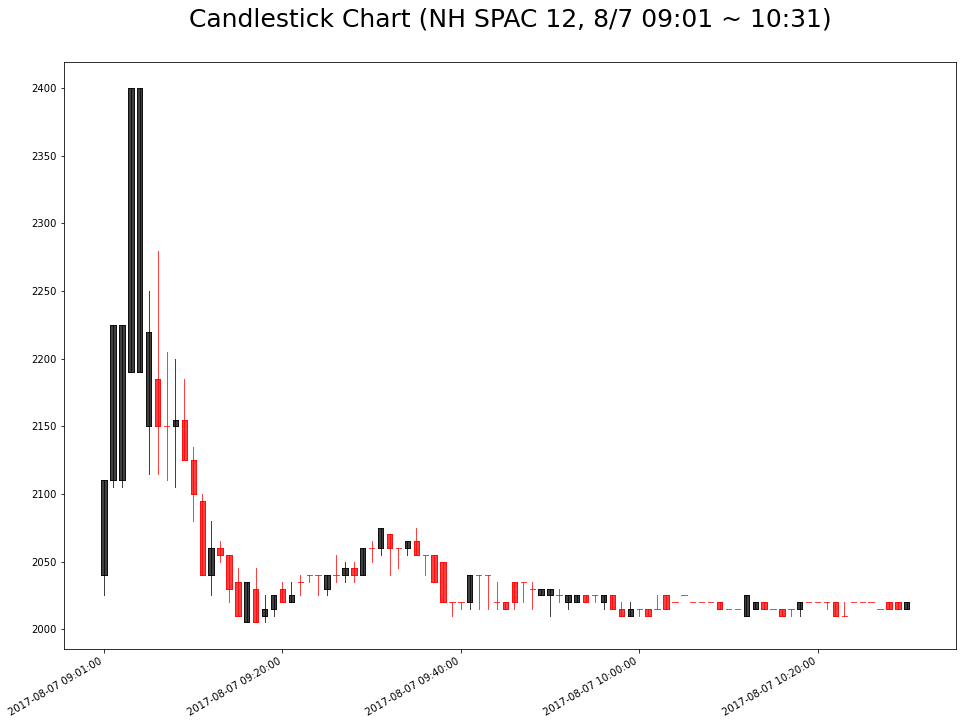

In [187]:
#!pip install https://github.com/matplotlib/mpl_finance/archive/master.zip
from mpl_finance import candlestick2_ohlc
import matplotlib.ticker as ticker

# 'KR727306004' 종목에 대해서 8월 7일 09:01 ~ 10:31 데이터만 선택
data = df_final['2017-08-07 09:01':'2017-08-07 10:31']
data = data.loc[data['Code'] == 'KR7273060004']

index = data.index.astype('str')

# 차트 크기 조정
fig, ax = plt.subplots(figsize=(16,12)) 

# mpl_finance 패키지의 candlestick2_ohlc 함수를 사용해서 캔들스틱 차트 생성
candlestick2_ohlc(ax, data['Open'], data['High'],
                  data['Low'], data['Close'], width=0.6)

ax.xaxis.set_major_locator(ticker.MaxNLocator(6))

# x축을 날짜로 나타내기 위한 날짜 인덱싱 함수
def mydate(x,pos):
    try:
        return index[int(x-0.5)]
    except IndexError:
        return ''

ax.xaxis.set_major_formatter(ticker.FuncFormatter(mydate))

# 차트 타이틀 지정
plt.title('Candlestick Chart (NH SPAC 12, 8/7 09:01 ~ 10:31)', y=1.05, size=25)

fig.autofmt_xdate()
plt.show()

- matplotlib의 mpl_finance 패키지 내 candlestick2_ohlc 함수를 사용하여 캔들스틱 차트를 만든다.
- 가독성을 높이기 위해 임의로 한 종목(KR727306004)을 선택하고, 8월 7일 09:01 ~ 10:31 데이터만 추출하여 data에 저장한다.
- candlestick2_ohlc 함수를 사용하기 위해 index를 string으로 바꾸고, x축을 날짜로 나타내기 위하여 ticker.FuncFormatter 함수에 새롭게 정의한 mydate 함수를 사용한다.

### EoD.